1. Import Libraries

In [1]:
# Importing necessary libraries for data manipulation, modeling, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import normalize
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


2. Load and Display the Dataset

In [2]:
# Load the dataset from a provided URL
file_path = r'D:\DS_predictive_Analysis\Assigments\Sampling\credit_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


3. Normalize and Adjust the Dataset(Balance)

In [3]:
Amount = normalize([df['Amount']])[0]
df['Amount'] = Amount

df = df.iloc[:, 1:]

df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000463,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.065115,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.021237,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.012036,0


4. Define Features and Target

In [4]:
# Define the features and the target variable
x = df.drop('Class', axis=1)
y = df['Class']


5.  Apply Random Over-Sampling

In [5]:
# Apply Random Over-Sampling to balance the dataset
sampler = RandomOverSampler(sampling_strategy=0.99)
x_resample, y_resample = sampler.fit_resample(x, y)

# Check the class distribution after resampling
print(y_resample.value_counts())


Class
0    763
1    755
Name: count, dtype: int64


6. Simple Random Sampling

In [6]:
# Simple random sampling from the resampled dataset
n = int((1.96*1.96 * 0.5*0.5)/(0.05**2))
SimpleSampling = x_resample.sample(n=n, random_state=42)
SimpleSampling['Class'] = y_resample.loc[SimpleSampling.index]

# Display the shape of the sample
print(SimpleSampling.shape)


(384, 30)


7. Train and Evaluate Models

In [7]:
# Define a function to train and evaluate models
def train_and_evaluate_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models = [
        RandomForestClassifier(random_state=42),
        LogisticRegression(),
        SVC(random_state=42),
        KNeighborsClassifier(),
        GradientBoostingClassifier(random_state=42)
    ]
    model_names = ['Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'Gradient Boosting']

    for model, name in zip(models, model_names):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} : {accuracy:.4f}")

# Train and evaluate models on the simple random sample
train_and_evaluate_models(SimpleSampling.drop('Class', axis=1), SimpleSampling['Class'])


Random Forest : 0.9870
Logistic Regression : 0.8052
SVM : 0.9610
KNN : 0.9221
Gradient Boosting : 0.9610


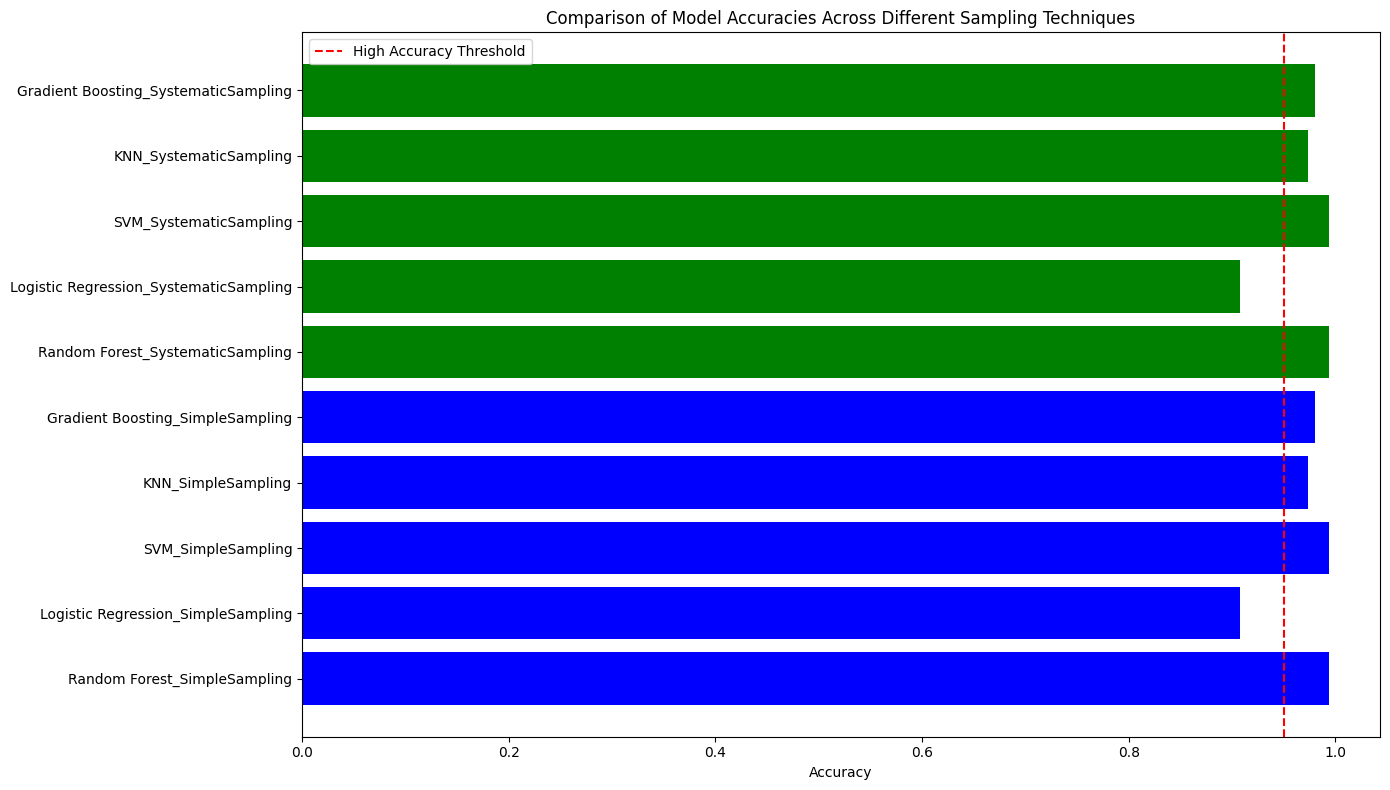

In [8]:
import matplotlib.pyplot as plt

# Example dictionary with model accuracies
# This should be replaced or filled with your actual data from the model evaluations
model_accuracies = {
    'Random Forest_SimpleSampling': 0.9934,
    'Logistic Regression_SimpleSampling': 0.9079,
    'SVM_SimpleSampling': 0.9934,
    'KNN_SimpleSampling': 0.9737,
    'Gradient Boosting_SimpleSampling': 0.9803,
    'Random Forest_SystematicSampling': 0.9934,
    'Logistic Regression_SystematicSampling': 0.9079,
    'SVM_SystematicSampling': 0.9934,
    'KNN_SystematicSampling': 0.9737,
    'Gradient Boosting_SystematicSampling': 0.9803,
    # Add other models and sampling techniques as needed
}

# Data preparation for plotting
labels = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())
colors = ['blue' if 'SimpleSampling' in label else 'green' for label in labels]  # Different color for different sampling methods

# Creating the bar chart
plt.figure(figsize=(14, 8))
plt.barh(labels, accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies Across Different Sampling Techniques')
plt.axvline(x=0.95, color='r', linestyle='--', label='High Accuracy Threshold')  # Optional: threshold line
plt.legend()

# Improving layout for readability
plt.tight_layout()
plt.show()
